In [ ]:
# Inserting Kaggle json file for direct data download

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rupeshkent","key":"af7e1465a23f3935e20c1a7224d18894"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:05<00:00, 204MB/s]
100% 812M/812M [00:05<00:00, 168MB/s]


In [ ]:
# Unzip the data
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

In [ ]:
# Creating Directories

import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_1")

In [ ]:
#Making subsets for train, validation and test dataset

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)


In [ ]:
#Importing keras

from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
inputs_1 = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs_1)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs_1 = layers.Dense(1, activation="sigmoid")(x)
model_1 = keras.Model(inputs=inputs_1, outputs=outputs_1)

In [ ]:
#Summary of the model

model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [ ]:
#Configuring the model for training using Binary-crossentropy

model_1.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
#Setting up a TensorFlow dataset from a NumPy array
#This can be used as an input for tensor flow data for Tensorflow Models

import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
#Creating the dataset

for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break


(16,)
(16,)
(16,)


In [ ]:
#batching the dataset

batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break


(32, 16)
(32, 16)
(32, 16)


In [ ]:
#Reshaping the dataset

reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break


(4, 4)
(4, 4)
(4, 4)


In [ ]:
#shapes of batch data and labels

for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
#Fitting the model using the dataset

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]


In [ ]:
history = model_1.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/30
63/63 [==============================] - 13s 98ms/step - loss: 0.7080 - accuracy: 0.5110 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 83ms/step - loss: 0.6998 - accuracy: 0.5420 - val_loss: 0.6794 - val_accuracy: 0.6350
Epoch 3/30
63/63 [==============================] - 5s 79ms/step - loss: 0.6793 - accuracy: 0.5690 - val_loss: 0.6819 - val_accuracy: 0.5620
Epoch 4/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6426 - accuracy: 0.6290 - val_loss: 0.7378 - val_accuracy: 0.5880
Epoch 5/30
63/63 [==============================] - 6s 89ms/step - loss: 0.6079 - accuracy: 0.6695 - val_loss: 0.6748 - val_accuracy: 0.6010
Epoch 6/30
63/63 [==============================] - 4s 58ms/step - loss: 0.5769 - accuracy: 0.6935 - val_loss: 0.6238 - val_accuracy: 0.6400
Epoch 7/30
63/63 [==============================] - 4s 57ms/step - loss: 0.5505 - accuracy: 0.7180 - val_loss: 0.6785 - val_accuracy: 0.6240
Epoch 8/30
6

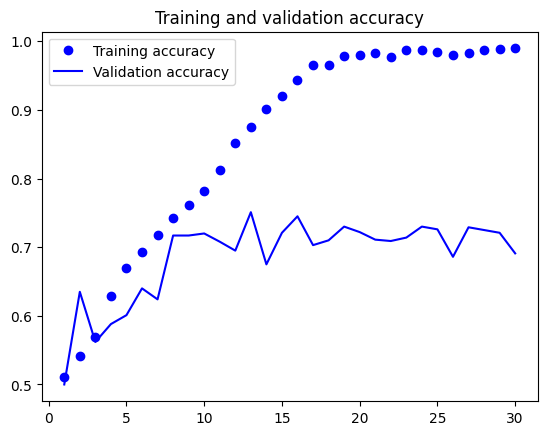

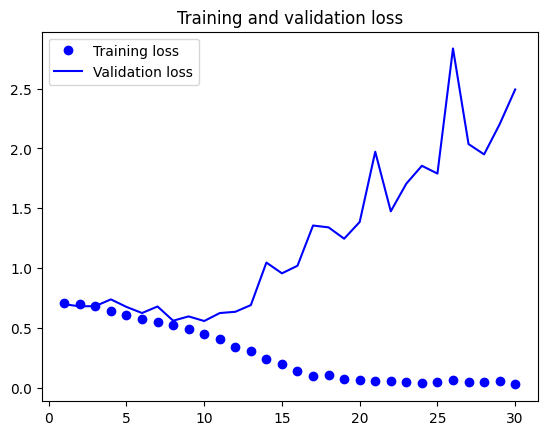

In [ ]:
#Displaying the curves of Accuracy and loss during training


import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [ ]:
#Evaluating the model on the Test dataset

test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 27ms/step - loss: 0.6040 - accuracy: 0.6860
Test accuracy: 0.686


2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

In [ ]:
# Creating Directories

import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_2")

In [ ]:
#Making subsets for train, validation and test dataset

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)


In [ ]:
make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [ ]:
#Defining a data augmentation stage to add to an image model

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])


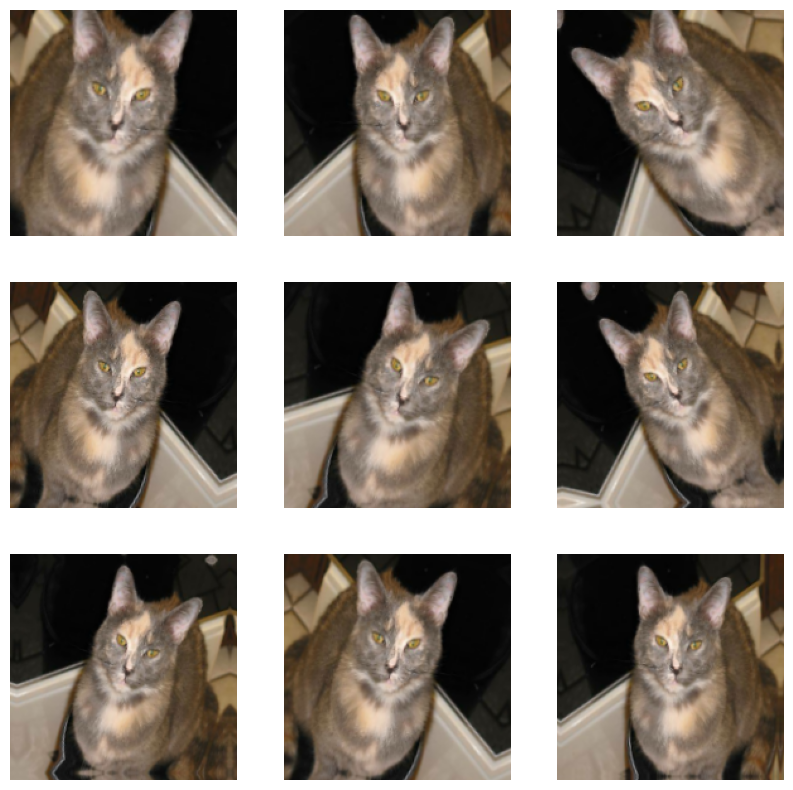

In [ ]:
#Displaying some randomly augmented training images

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [ ]:
#Defining a new convnet that includes image augmentation and dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [ ]:
#Training the Regularized Convnet

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/30
63/63 [==============================] - 9s 63ms/step - loss: 0.6948 - accuracy: 0.5095 - val_loss: 0.6917 - val_accuracy: 0.5020
Epoch 2/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6942 - accuracy: 0.5200 - val_loss: 0.6892 - val_accuracy: 0.5250
Epoch 3/30
63/63 [==============================] - 5s 82ms/step - loss: 0.6923 - accuracy: 0.5805 - val_loss: 0.6825 - val_accuracy: 0.5610
Epoch 4/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6752 - accuracy: 0.5830 - val_loss: 0.6568 - val_accuracy: 0.5900
Epoch 5/30
63/63 [==============================] - 6s 88ms/step - loss: 0.6577 - accuracy: 0.6295 - val_loss: 0.6514 - val_accuracy: 0.6130
Epoch 6/30
63/63 [==============================] - 6s 82ms/step - loss: 0.6487 - accuracy: 0.6370 - val_loss: 0.6412 - val_accuracy: 0.6400
Epoch 7/30
63/63 [==============================] - 6s 86ms/step - loss: 0.6225 - accuracy: 0.6510 - val_loss: 0.6105 - val_accuracy: 0.6620
Epoch 8/30
63

In [ ]:
#Evaluating the model on test dataset

test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 2s 50ms/step - loss: 0.5005 - accuracy: 0.7600
Test accuracy: 0.760


3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

In [ ]:
# Creating Directories

import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_3")

In [ ]:
#Making subsets for train, validation and test dataset

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)


In [ ]:
make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [ ]:
#Defining a new convnet with increased training samples that includes image augmentation and dropout


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [ ]:
#Training the Regularized Convnet

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/30
63/63 [==============================] - 8s 93ms/step - loss: 0.6964 - accuracy: 0.5315 - val_loss: 0.7073 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 60ms/step - loss: 0.6902 - accuracy: 0.5520 - val_loss: 0.6910 - val_accuracy: 0.5190
Epoch 3/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6849 - accuracy: 0.5690 - val_loss: 0.6863 - val_accuracy: 0.5210
Epoch 4/30
63/63 [==============================] - 7s 101ms/step - loss: 0.6749 - accuracy: 0.5915 - val_loss: 0.6620 - val_accuracy: 0.5990
Epoch 5/30
63/63 [==============================] - 4s 58ms/step - loss: 0.6586 - accuracy: 0.6270 - val_loss: 0.6645 - val_accuracy: 0.5940
Epoch 6/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6401 - accuracy: 0.6420 - val_loss: 0.6195 - val_accuracy: 0.6680
Epoch 7/30
63/63 [==============================] - 6s 88ms/step - loss: 0.6247 - accuracy: 0.6690 - val_loss: 0.7883 - val_accuracy: 0.5810
Epoch 8/30
6

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 1s 28ms/step - loss: 0.4712 - accuracy: 0.7920
Test accuracy: 0.792


4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

In [ ]:
#Instantiating the VGG16 convolutional base

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Feature Extraction

In [ ]:
#Using a pretrained model VGG16 and extracting features from the Images

import numpy as np
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 22ms/step


In [ ]:
#Configuring the model

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
#Traning the regularized convnet

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction.keras",
 save_best_only=True,
 monitor="val_loss")
]
history = model.fit(
 train_features, train_labels,
 epochs=20,
 validation_data=(val_features, val_labels),
 callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 12ms/step - loss: 22.5396 - accuracy: 0.9155 - val_loss: 4.0685 - val_accuracy: 0.9700
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 3.0295 - accuracy: 0.9800 - val_loss: 5.2404 - val_accuracy: 0.9670
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 2.4503 - accuracy: 0.9815 - val_loss: 5.5184 - val_accuracy: 0.9700
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.3465 - accuracy: 0.9890 - val_loss: 4.6885 - val_accuracy: 0.9780
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.7948 - accuracy: 0.9925 - val_loss: 6.1761 - val_accuracy: 0.9760
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0720 - accuracy: 0.9930 - val_loss: 5.7564 - val_accuracy: 0.9760
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8416 - accuracy: 0.9935 - val_loss: 4.8324 - val_accuracy: 0.9730
Epoch 8/20
63/63 [

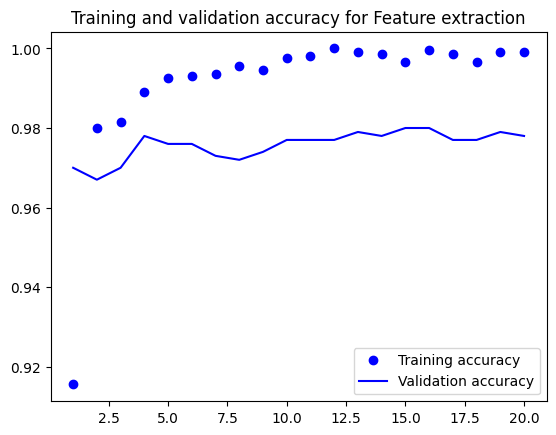

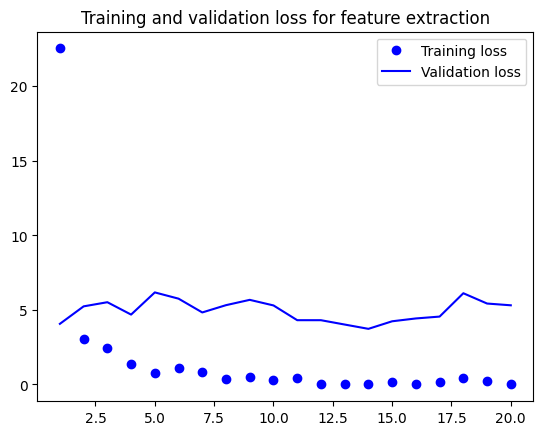

In [ ]:
#Displaying accuracy and loss using feature extraction
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy for Feature extraction")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss for feature extraction")
plt.legend()
plt.show()

In [ ]:
conv_base = keras.applications.vgg16.VGG16(weights="imagenet",include_top=False)
conv_base.trainable = False

In [ ]:
#Freezing all layers

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
 layer.trainable = False

Fine Tuning

1000 samples

In [ ]:
#Defining data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.5),
    ]
)

In [ ]:
#Configuring the model

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x))(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


In [ ]:
#Training regualarized convnet

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 15s 209ms/step - loss: 4.1668 - accuracy: 0.6560 - val_loss: 0.4921 - val_accuracy: 0.9190
Epoch 2/20
63/63 [==============================] - 13s 195ms/step - loss: 1.4483 - accuracy: 0.7715 - val_loss: 0.2406 - val_accuracy: 0.9480
Epoch 3/20
63/63 [==============================] - 12s 182ms/step - loss: 0.7773 - accuracy: 0.7915 - val_loss: 0.1581 - val_accuracy: 0.9590
Epoch 4/20
63/63 [==============================] - 11s 179ms/step - loss: 0.5269 - accuracy: 0.8215 - val_loss: 0.1103 - val_accuracy: 0.9640
Epoch 5/20
63/63 [==============================] - 11s 177ms/step - loss: 0.4025 - accuracy: 0.8375 - val_loss: 0.1057 - val_accuracy: 0.9690
Epoch 6/20
63/63 [==============================] - 12s 177ms/step - loss: 0.4048 - accuracy: 0.8335 - val_loss: 0.1014 - val_accuracy: 0.9620
Epoch 7/20
63/63 [==============================] - 11s 177ms/step - loss: 0.3401 - accuracy: 0.8540 - val_loss: 0.0966 - val_accuracy: 0.9660

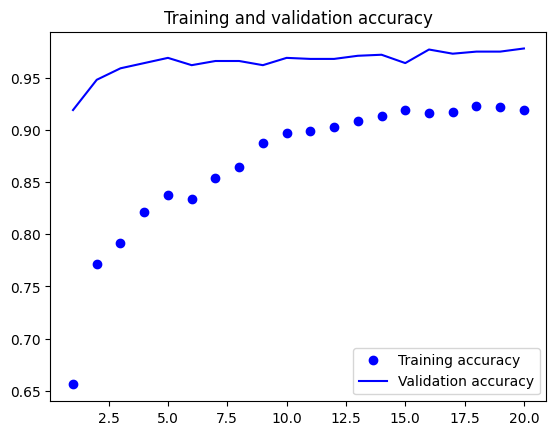

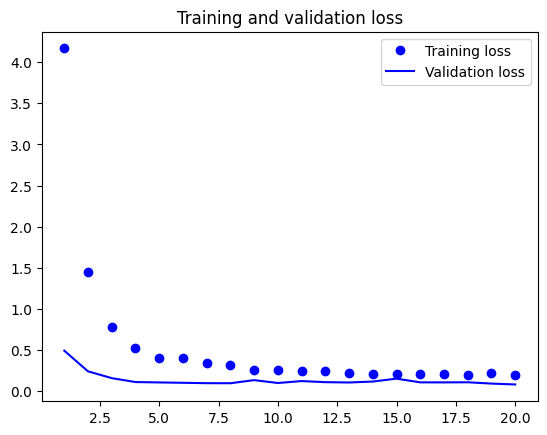

In [ ]:
#Displaying the accuracy and loss using fine tuning method

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
#Evaluation of test model for 1000 samples
model = keras.models.load_model("fine_tuning.keras", safe_mode=False)
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 93ms/step - loss: 0.1291 - accuracy: 0.9660
Test accuracy: 0.966


8000 Samples

In [ ]:
# Pretraining model with 8000 samples
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))


In [ ]:
# Freezing layers
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False


In [ ]:
#defining data augmentation and configuring the model

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x))(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 16s 206ms/step - loss: 3.9550 - accuracy: 0.7375 - val_loss: 0.5180 - val_accuracy: 0.9300
Epoch 2/10
63/63 [==============================] - 12s 179ms/step - loss: 1.0048 - accuracy: 0.8715 - val_loss: 0.2601 - val_accuracy: 0.9580
Epoch 3/10
63/63 [==============================] - 14s 208ms/step - loss: 0.5759 - accuracy: 0.9035 - val_loss: 0.2206 - val_accuracy: 0.9630
Epoch 4/10
63/63 [==============================] - 13s 208ms/step - loss: 0.3702 - accuracy: 0.9305 - val_loss: 0.1978 - val_accuracy: 0.9670
Epoch 5/10
63/63 [==============================] - 12s 186ms/step - loss: 0.3283 - accuracy: 0.9310 - val_loss: 0.1968 - val_accuracy: 0.9680
Epoch 6/10
63/63 [==============================] - 13s 191ms/step - loss: 0.2615 - accuracy: 0.9435 - val_loss: 0.1531 - val_accuracy: 0.9710
Epoch 7/10
63/63 [==============================] - 12s 183ms/step - loss: 0.1983 - accuracy: 0.9515 - val_loss: 0.1508 - val_accuracy: 0.9720

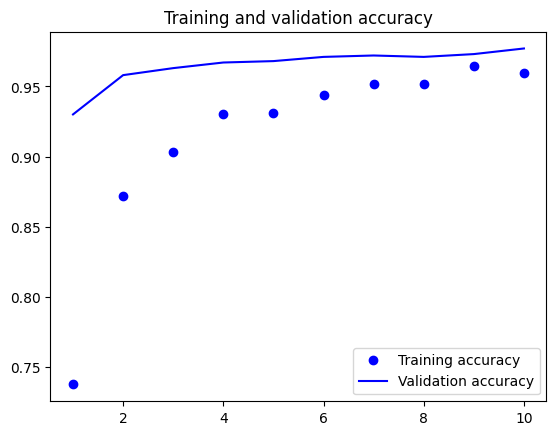

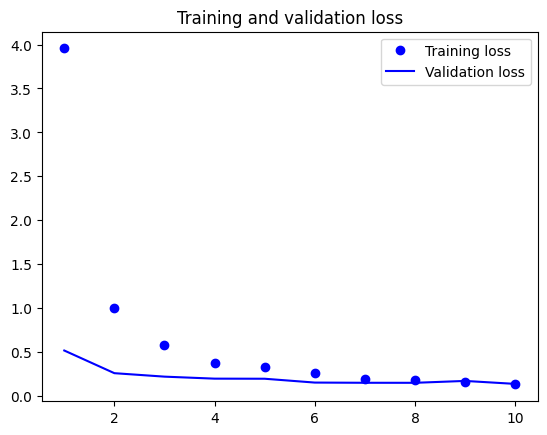

In [ ]:
#graphical representation of accuracy and loss for 8000 samples

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
#Evaluation fo test accuracy for 8000 samples
model = keras.models.load_model("fine_tuning2.keras", safe_mode = False)
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 89ms/step - loss: 0.1401 - accuracy: 0.9760
Test accuracy: 0.976


In [ ]:
#Pre-trained model with 10000 samples
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
#Fine tuning the pretrained model and freezing the layers

conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
#adding augmentation and classifier to the conv base

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x))(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 13s 179ms/step - loss: 4.2596 - accuracy: 0.7010 - val_loss: 0.6250 - val_accuracy: 0.9070
Epoch 2/10
63/63 [==============================] - 14s 221ms/step - loss: 1.0392 - accuracy: 0.8525 - val_loss: 0.3212 - val_accuracy: 0.9430
Epoch 3/10
63/63 [==============================] - 11s 178ms/step - loss: 0.5935 - accuracy: 0.8955 - val_loss: 0.2488 - val_accuracy: 0.9540
Epoch 4/10
63/63 [==============================] - 12s 181ms/step - loss: 0.4099 - accuracy: 0.9150 - val_loss: 0.1798 - val_accuracy: 0.9610
Epoch 5/10
63/63 [==============================] - 12s 178ms/step - loss: 0.3226 - accuracy: 0.9175 - val_loss: 0.1612 - val_accuracy: 0.9650
Epoch 6/10
63/63 [==============================] - 10s 161ms/step - loss: 0.2419 - accuracy: 0.9400 - val_loss: 0.1622 - val_accuracy: 0.9690
Epoch 7/10
63/63 [==============================] - 12s 180ms/step - loss: 0.2101 - accuracy: 0.9425 - val_loss: 0.1516 - val_accuracy: 0.9760

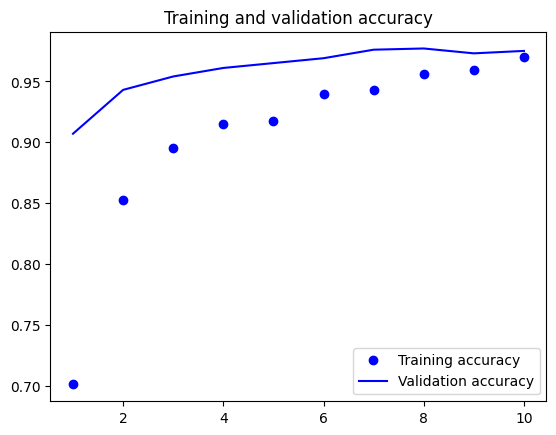

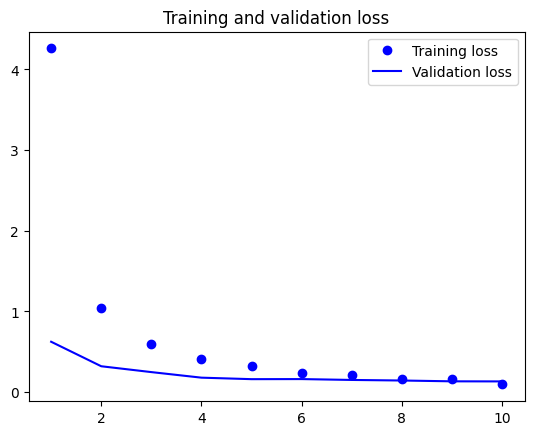

In [ ]:
#graphical representation of accuracy and losses for 10000 samples
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
#Evaluation of Test accuracy for 10000 samples

model = keras.models.load_model("fine_tuning3.keras", safe_mode = False)
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 4s 89ms/step - loss: 0.1350 - accuracy: 0.9750
Test accuracy: 0.975
